In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
%matplotlib inline

In [6]:
# Get path to data directory
import os
workingdir = os.path.abspath(os.getcwd())
datadir = workingdir + '\data'
expressiondir = datadir + "\\facial_expressions"
datafile = expressiondir + '/data/legend-copy.csv'
datafile2 = expressiondir + '/data/500_picts_satz.csv'
imagedir = expressiondir + '\\images'

In [77]:
face1 = pd.read_csv(datafile, index_col = False)
face2 = pd.read_csv(datafile2, names = face1.columns, index_col = False)
faces = pd.concat([face1,face2])

In [78]:
faces = faces[1:] # First image doesn't work
faces = faces.reset_index(drop = True)

In [92]:
emotions = faces.emotion.value_counts()

In [93]:
emotions

neutral      6952
happiness    5893
surprise      367
anger         366
sadness       268
disgust       208
fear           75
sad            50
contempt        9
Name: emotion, dtype: int64

In [100]:
faces[faces.emotion == 'neutral'].image[:20]

2           Aaron_Eckhart_0001.jpg
4         Aaron_Patterson_0001.jpg
8           Aaron_Peirsol_0003.jpg
9              Aaron_Pena_0001.jpg
12           Aaron_Tippin_0001.jpg
13       Abbas_Kiarostami_0001.jpg
15    Abdel_Aziz_Al-Hakim_0001.jpg
16     Abdel_Madi_Shabneh_0001.jpg
17    Abdel_Nasser_Assidi_0001.jpg
18    Abdel_Nasser_Assidi_0002.jpg
19         Abdoulaye_Wade_0001.jpg
21         Abdoulaye_Wade_0003.jpg
23      Abdulaziz_Kamilov_0001.jpg
24               Abdullah_0001.jpg
25               Abdullah_0002.jpg
26               Abdullah_0003.jpg
27               Abdullah_0004.jpg
29    Abdullah_al-Attiyah_0003.jpg
30           Abdullah_Gul_0001.jpg
35           Abdullah_Gul_0006.jpg
Name: image, dtype: object

In [109]:
pd.Series(faces.image.value_counts().values).value_counts()

1    13172
2      508
dtype: int64

neutral


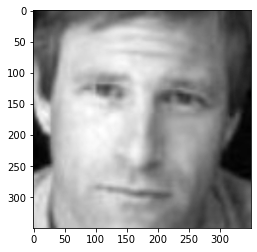

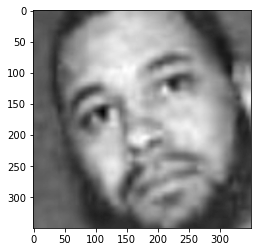

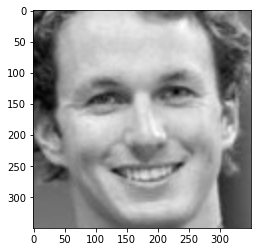

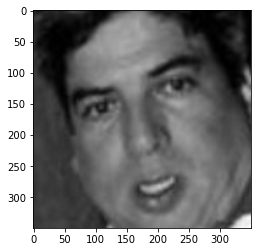

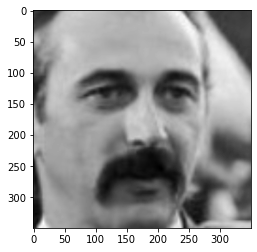

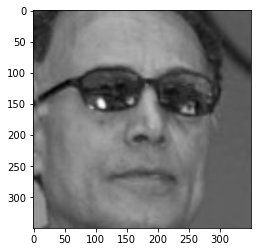

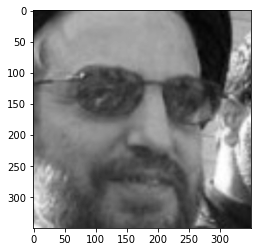

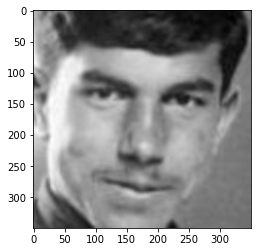

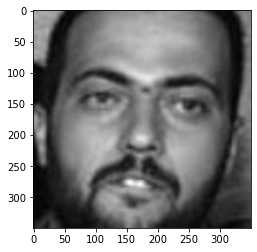

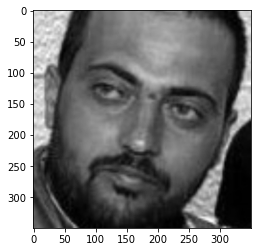

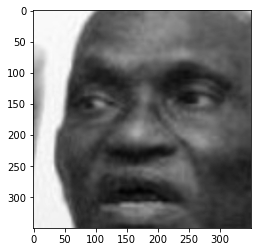

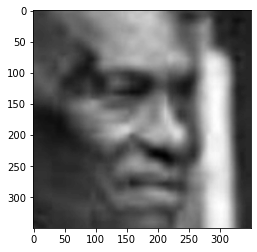

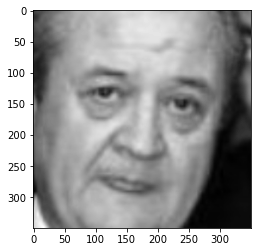

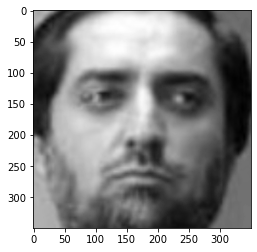

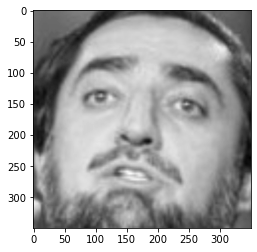

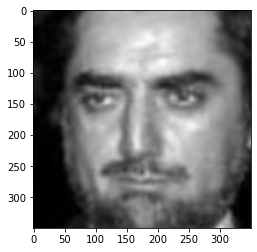

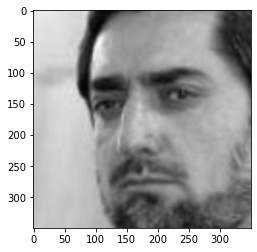

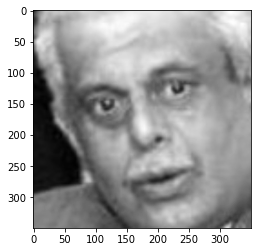

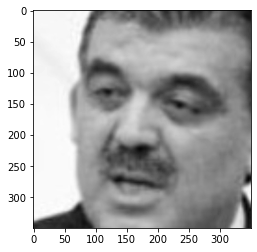

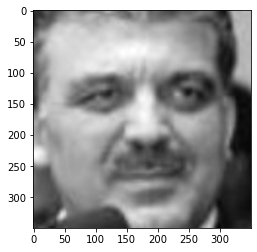

happiness


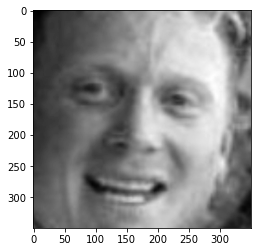

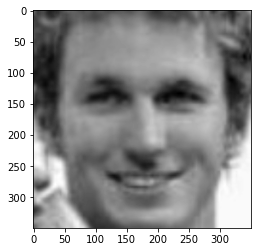

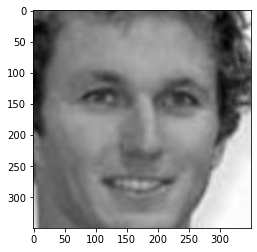

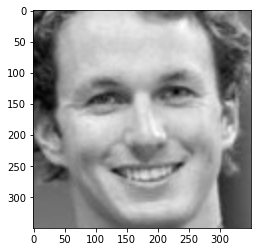

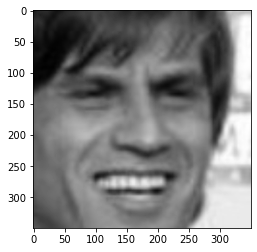

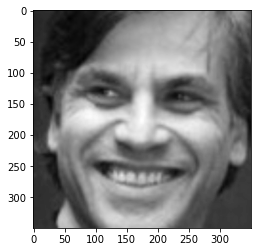

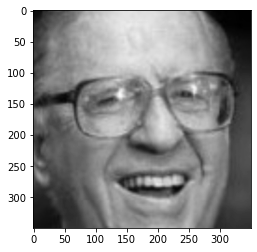

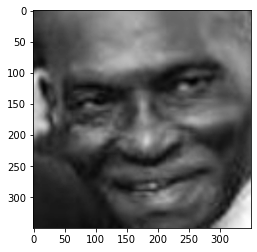

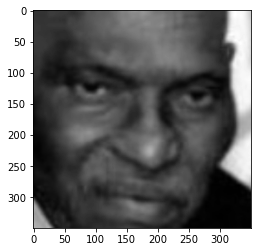

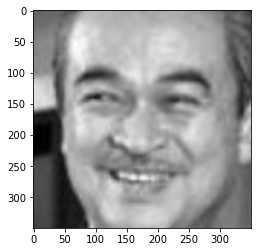

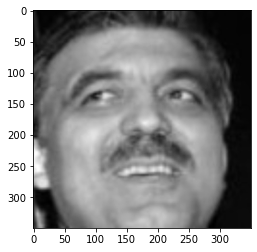

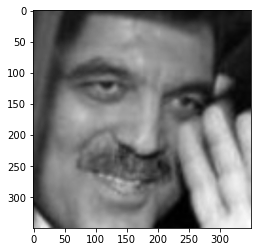

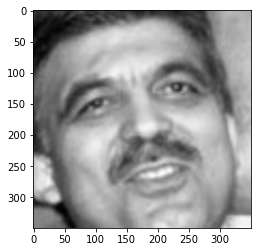

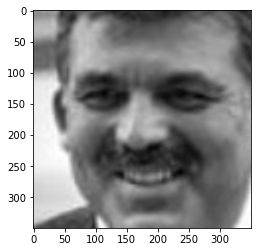

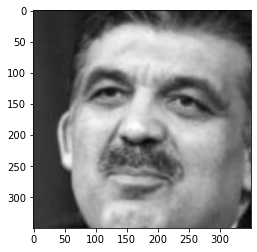

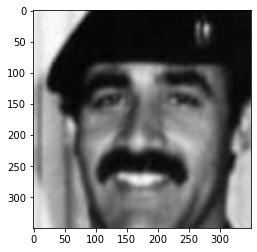

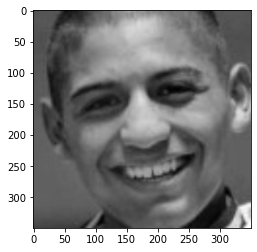

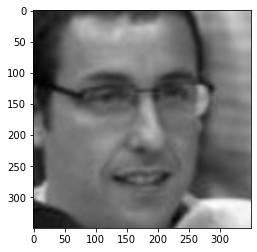

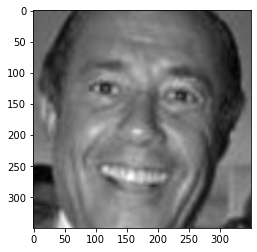

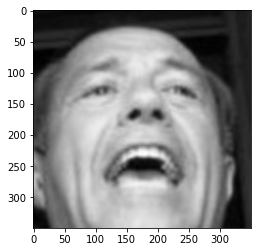

surprise


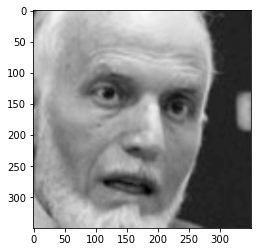

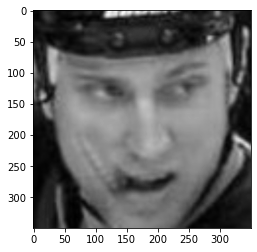

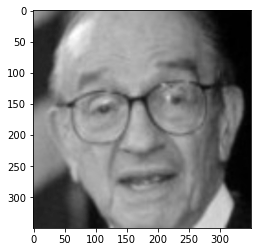

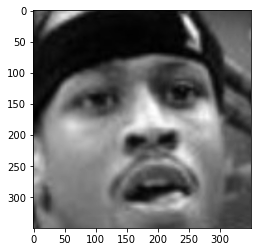

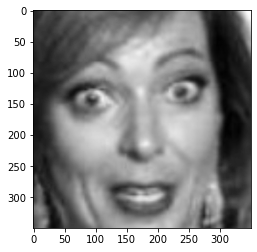

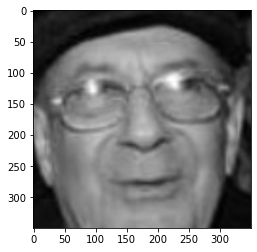

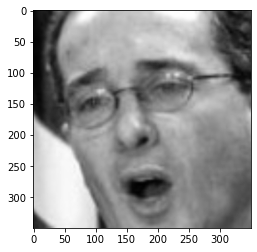

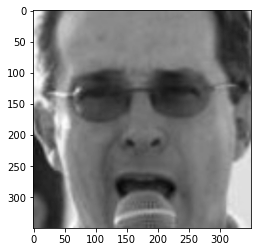

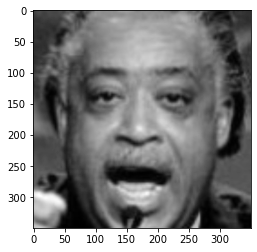

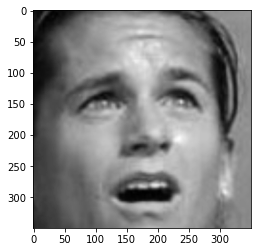

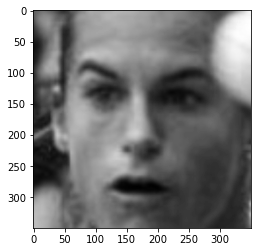

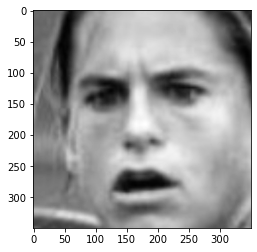

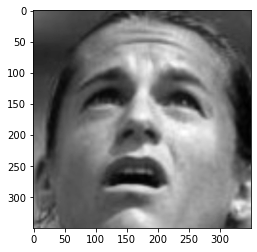

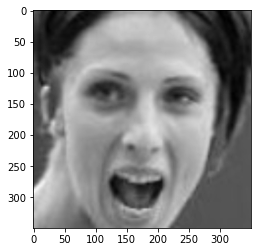

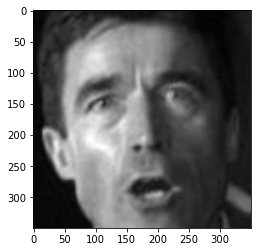

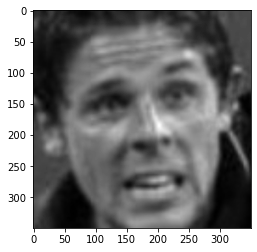

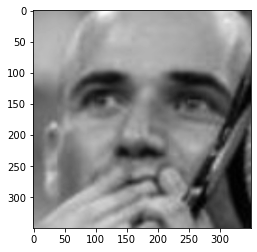

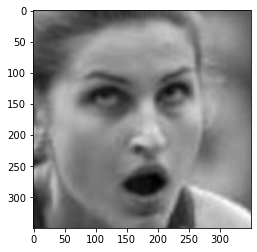

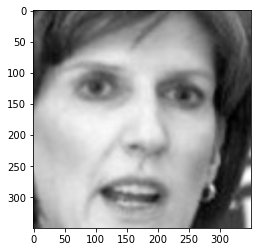

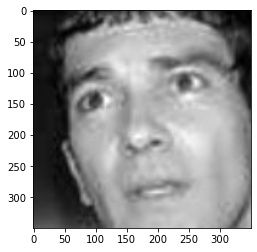

anger


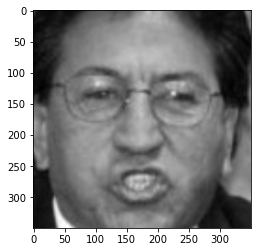

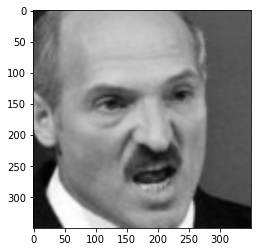

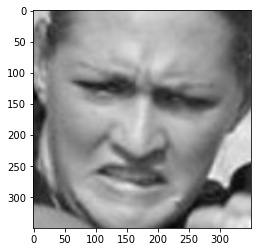

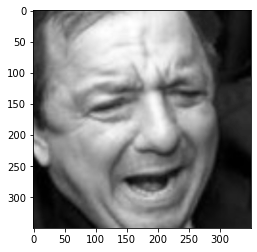

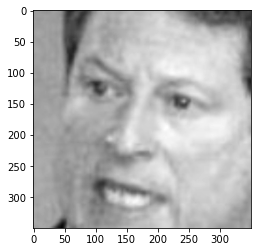

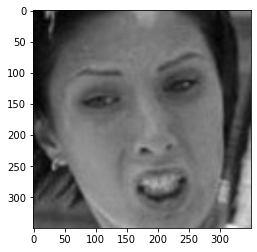

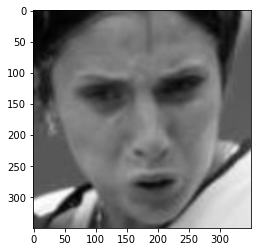

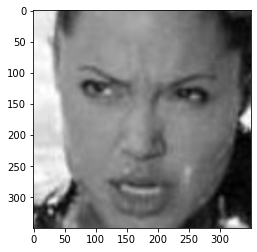

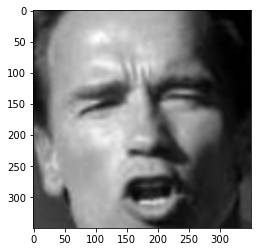

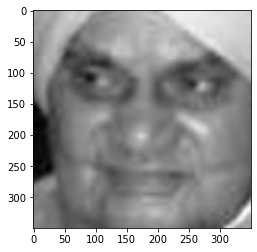

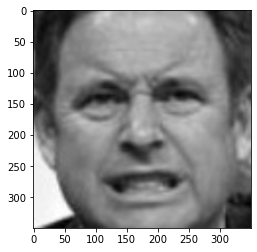

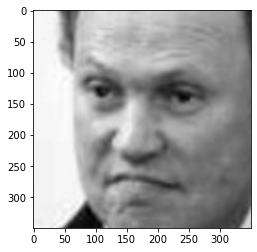

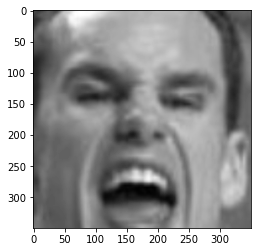

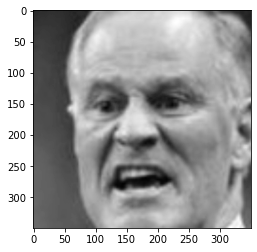

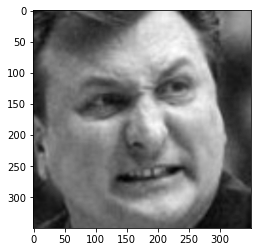

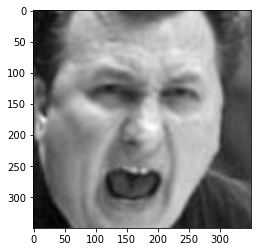

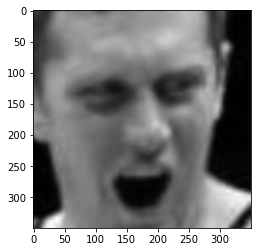

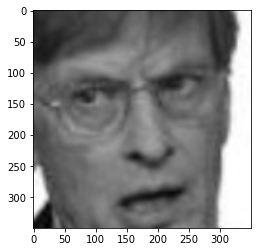

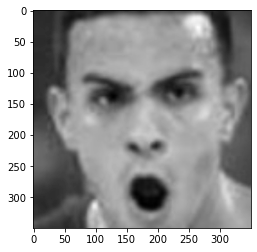

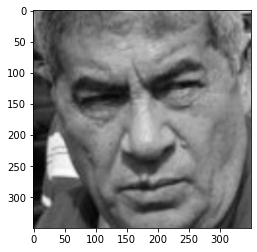

sadness


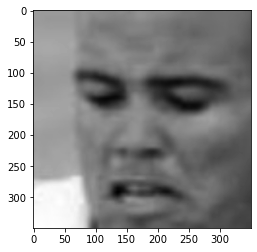

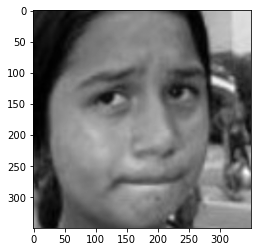

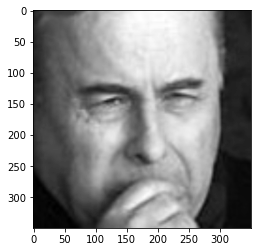

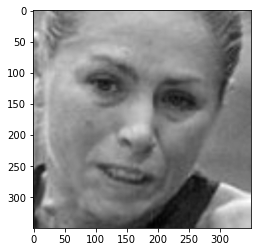

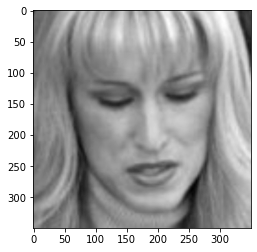

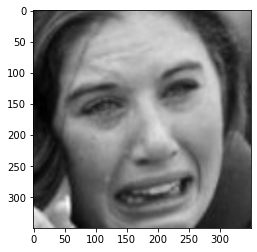

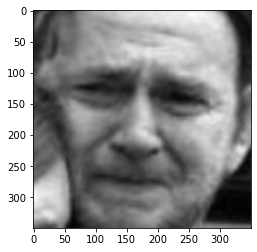

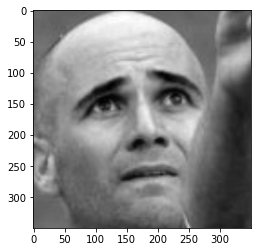

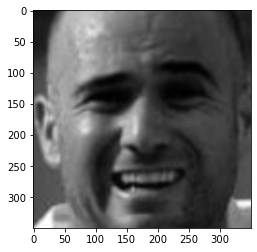

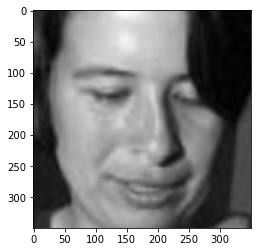

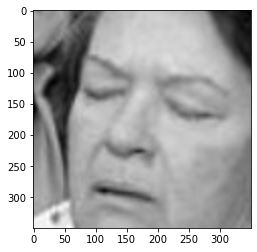

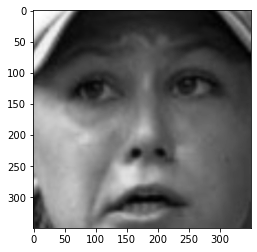

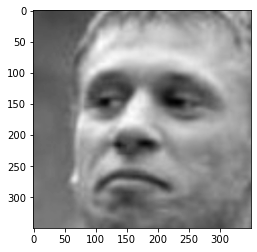

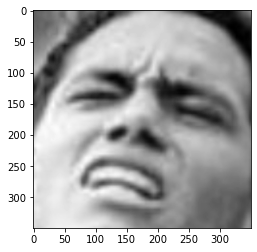

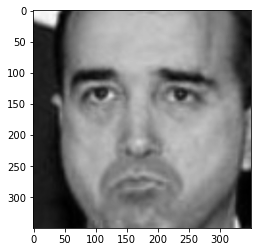

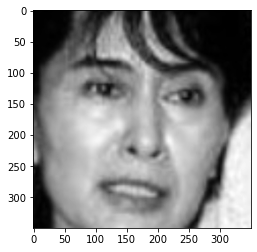

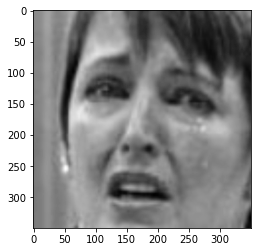

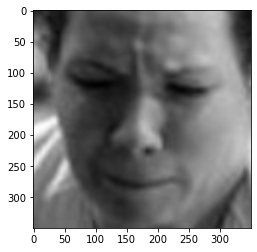

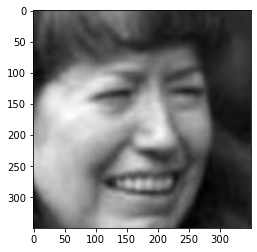

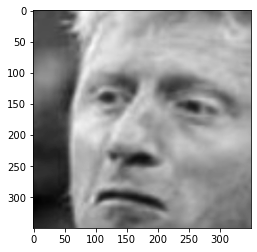

disgust


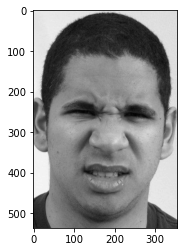

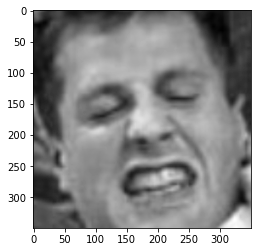

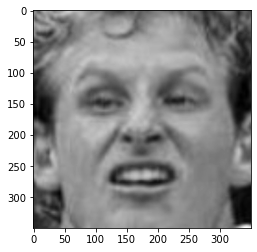

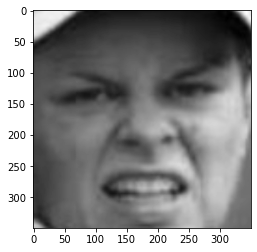

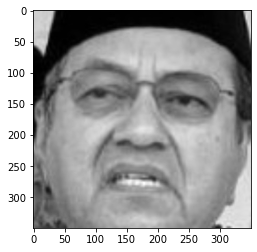

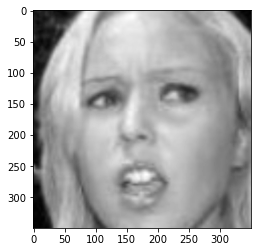

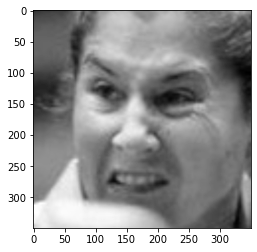

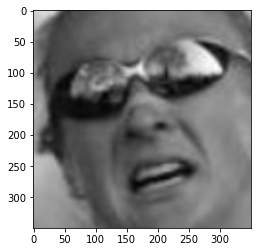

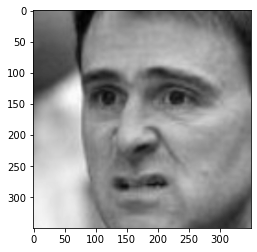

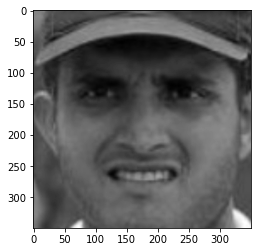

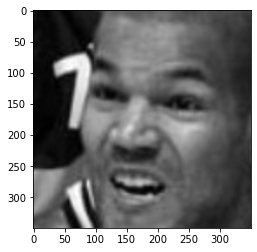

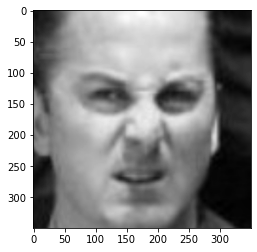

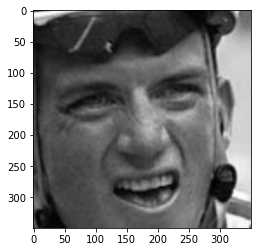

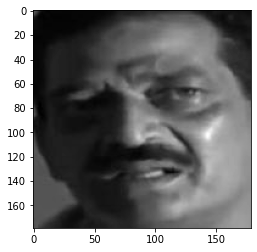

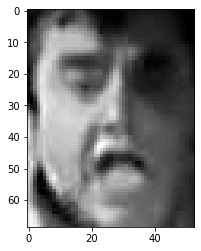

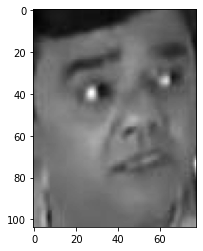

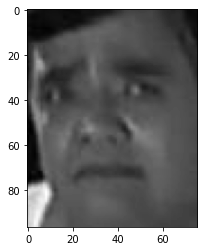

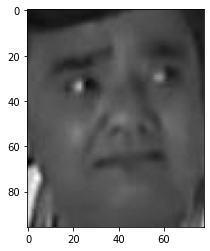

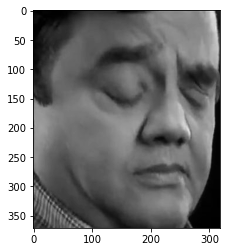

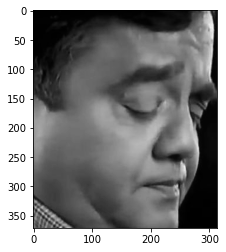

fear


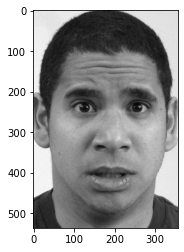

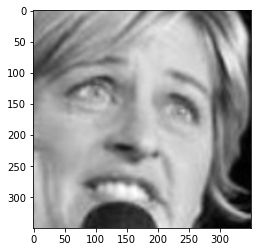

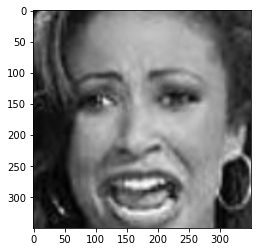

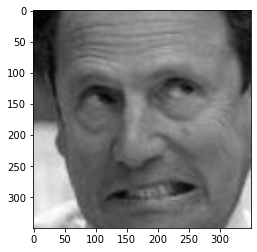

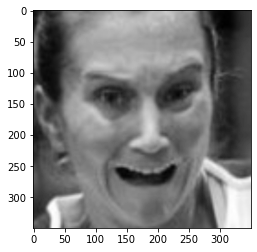

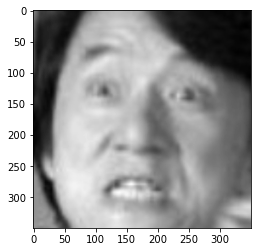

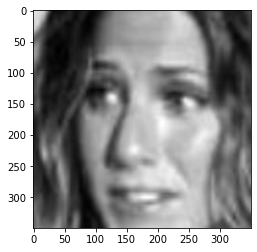

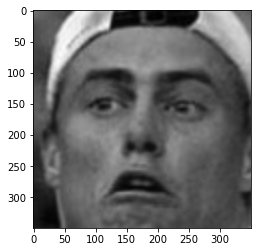

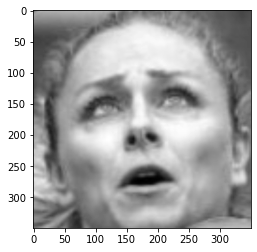

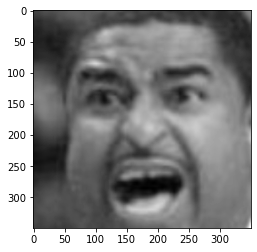

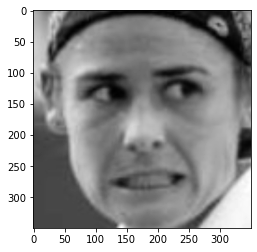

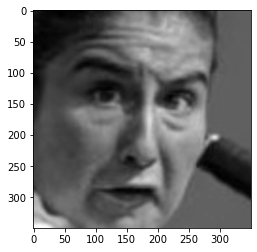

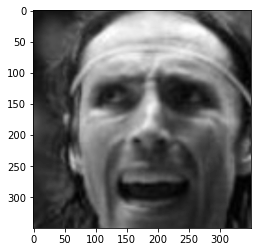

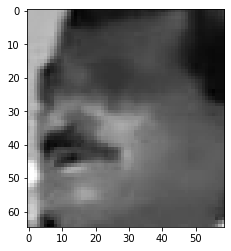

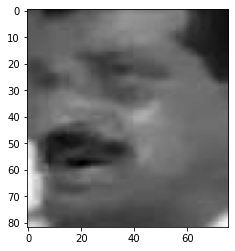

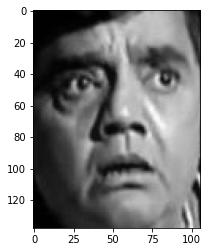

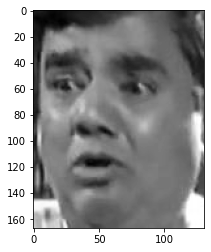

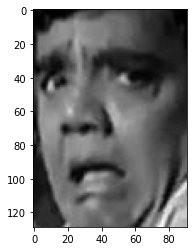

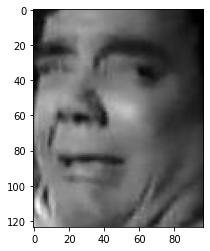

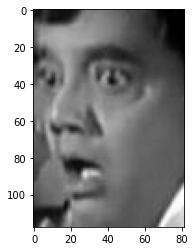

sad


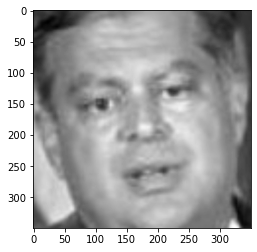

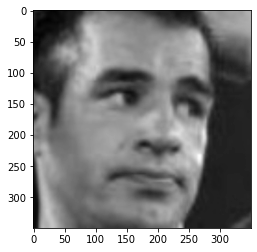

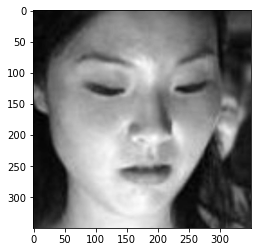

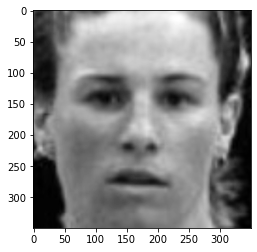

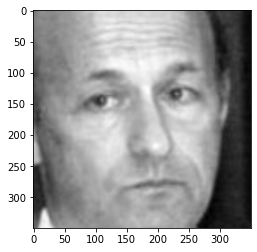

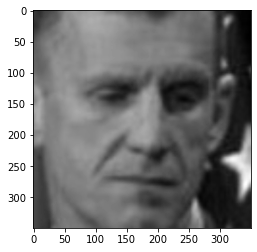

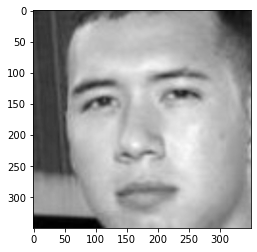

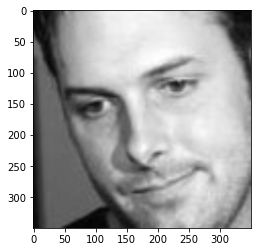

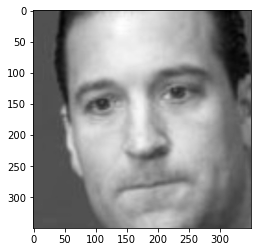

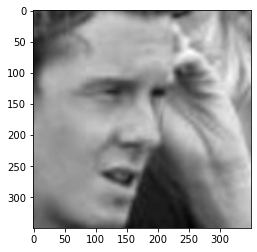

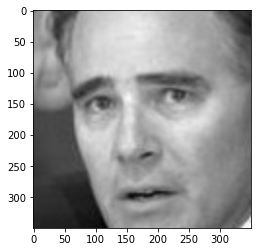

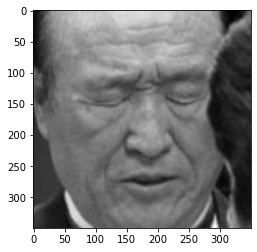

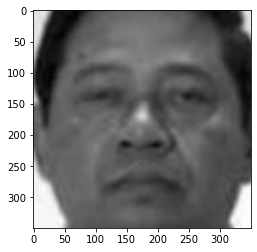

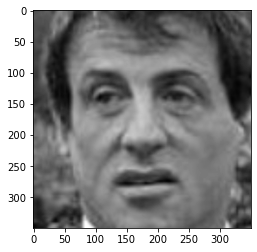

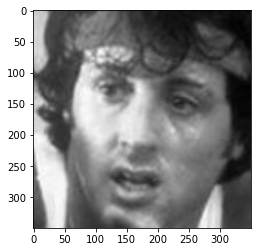

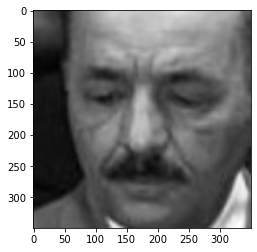

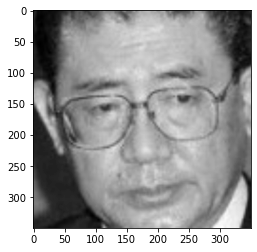

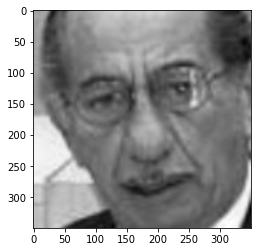

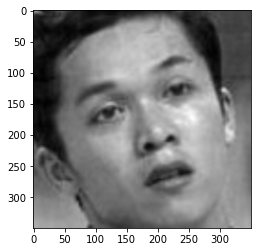

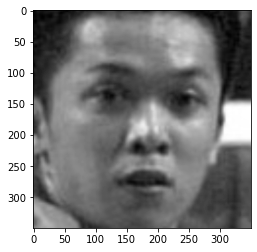

contempt


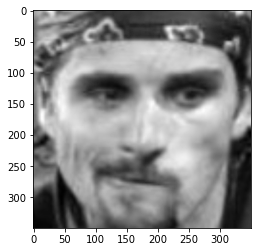

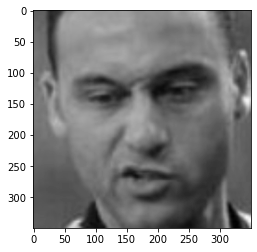

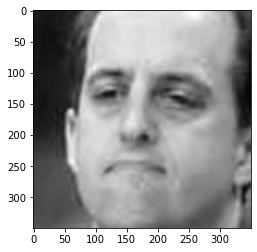

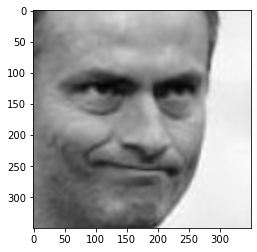

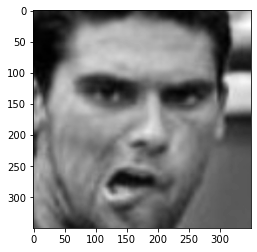

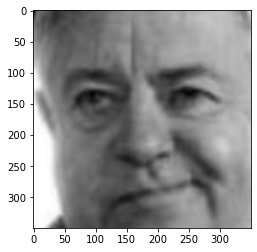

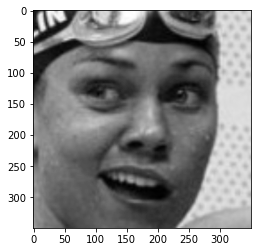

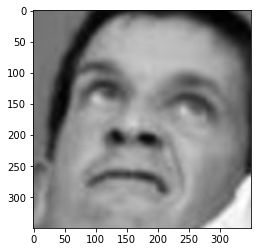

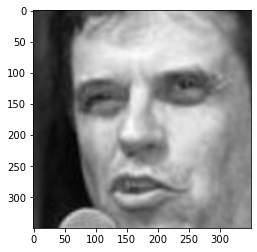

In [97]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for emo in emotions.index:
    print(emo)
    for idx in faces.emotion[faces.emotion == emo].index[:20]: 
        image1 = imagedir + '/' + faces.image[idx]
        img=mpimg.imread(image1)
        if img.ndim>2:
            img = rgb2gray(img)
        plt.imshow(img, cmap = 'gray')
        plt.show()

In [60]:
facevalue = {value : test for test, value in enumerate(faces.emotion.value_counts().sort_values().to_dict())}
facevalue

{'contempt': 0,
 'sad': 1,
 'fear': 2,
 'disgust': 3,
 'sadness': 4,
 'anger': 5,
 'surprise': 6,
 'happiness': 7,
 'neutral': 8}

In [61]:
faces.emotion.apply(lambda x: facevalue[x])

0        3
1        2
2        8
3        7
4        8
        ..
14183    8
14184    8
14185    8
14186    8
14187    7
Name: emotion, Length: 14188, dtype: int64

In [113]:
X_file = face2.image

In [142]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def gray2rgb(gray):
    return np.stack([gray, gray, gray], axis = 2)

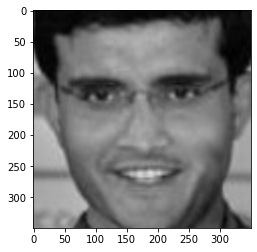

In [145]:
idx = 1
image1 = imagedir + '/' + face2.image.iloc[idx]
img=mpimg.imread(image1)
# if img.ndim>2:
#     img = rgb2gray(img)
if img.ndim == 2:
    img = gray2rgb(img)
plt.imshow(img)

In [148]:
test_image = []
for i in tqdm(range(X_file.shape[0])):
    image = imagedir + '/' + X_file[i]
    img=mpimg.imread(image1)
#     if img.ndim>2:
#         img = rgb2gray(img)
    if img.ndim == 2:
        img = gray2rgb(img)
    test_image.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 864.29it/s]


In [150]:
test_image = np.stack(test_image, axis = 0)

In [151]:
test_image.shape

(500, 350, 350, 3)

In [164]:
from tensorflow.keras.models import load_model
model = load_model('initialmodel')

In [168]:
prediction = model.predict_classes(test_image)

In [169]:
prediction

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [167]:
facevalue

{'contempt': 0,
 'sad': 1,
 'fear': 2,
 'disgust': 3,
 'sadness': 4,
 'anger': 5,
 'surprise': 6,
 'happiness': 7,
 'neutral': 8}

In [159]:
face2.image

0       Sourav_Ganguly_0003.jpg
1       Sourav_Ganguly_0004.jpg
2       Sourav_Ganguly_0005.jpg
3      Spencer_Abraham_0001.jpg
4      Spencer_Abraham_0003.jpg
                 ...           
495       Tim_Pawlenty_0001.jpg
496        Tim_Robbins_0001.jpg
497        Tim_Robbins_0002.jpg
498        Tim_Robbins_0003.jpg
499        Tim_Robbins_0004.jpg
Name: image, Length: 500, dtype: object